- Data science is mostly turning business problems into data problems and solve them 

- steps: collecting data - > understanding data -> cleaning data - > formatting data - > machine learning

# What is a model?

Specification of a mathematical relationship that exists between different variables.

Example: 
1. A business model that takes inputs like “number of users,” “ad revenue per user,” and “number of employees”and outputs your annual profit for the next several years - It's a simple mathematical relationships: profit is revenue minus expenses, revenue is units sold times average price, and so on.

2. if you’ve ever watched poker on television, you know that each player’s “win probability” is estimated inreal time based on a model that takes into account the cards that have been revealed so far and the distribution of cards in the deck - It's based on probability theory, the rules of poker, and some reasonably innocuousassumptions about the random process by which cards are dealt.

# What is Machine Learning?

- ML is creating and using models that are learned from data

- In other contexts this might be called **predictive modeling** or **data mining**

- Our goal: create a model using existing data -> use it to find various outcomes for new data

- Example: Whether an email message is spam or not?  Whether a credit card transaction is fraudulent?
Which advertisement a shopper is most likely to click on? Which football team is going to win the Super Bowl?

**Types of ML models**

Machine learning models can be categorized into several types based on the learning approach and the nature of the data. Here are some common types:

## Supervised Learning Models

In which there is a set of data labeled with the correct answers to learn from.

For example, if you want to teach a computer to recognize pictures of cats and dogs, you show it many pictures of cats labeled "cat" and many pictures of dogs labeled "dog". The computer learns from these examples and can then classify new pictures as either cats or dogs.

Examples:
- Linear Regression
- Logistic Regression
- Decision Trees
- Support Vector Machines (SVM)
- Neural Networks

## Unsupervised Learning Models

Unsupervised learning models are trained on unlabeled data and aim to find patterns, clusters, or hidden structures in the data.

It's like looking at a big jumble of puzzle pieces without knowing what the picture is supposed to look like. The computer tries to group similar pieces together to make sense of the puzzle without any guidance.

Examples:
- K-means Clustering
- Hierarchical Clustering
- Principal Component Analysis (PCA)
- Autoencoders

## Reinforcement Learning Models

Reinforcement learning models learn by interacting with an environment and receiving feedback in the form of rewards or penalties.(after making a series of predictions, the model gets a signalindicating how well it did)

It's like teaching a dog new tricks. You reward it when it does something right and punish it when it does something wrong. Over time, the dog learns which actions lead to rewards and which ones don't.

Examples:
- Q-learning
- Deep Q-Networks (DQN)
- Policy Gradient Methods
- Actor-Critic Methods

## Semi-Supervised Learning Models

Semi-supervised learning models combine supervised and unsupervised learning techniques and are useful when only a subset of the data is labeled.

It's like having a few labeled examples along with a lot of unlabeled data. The computer tries to use the labeled examples to guide its learning process while also finding patterns in the unlabeled data.

Examples:
- Self-training
- Co-training
- Label propagation

## Deep Learning Models

Deep learning models use neural networks with many layers (deep architectures) to learn intricate patterns from data.

It's like having many layers of filters to extract different features from the input data, allowing the computer to learn more intricate patterns and relationships

Examples:
- Convolutional Neural Networks (CNN)
- Recurrent Neural Networks (RNN)
- Long Short-Term Memory Networks (LSTM)
- Transformer Models

## Online models 

In which the model needs to continuously adjust to newly arriving data

# Overfitting and Underfitting

A common danger in machine learning is: 

**overfitting** 

- producing a model that performs well on the data you train it on but generalizes poorly to any new data.  

- This could involve learning <u>noise</u> in the data.
  
- Or it could involve learning to identify <u>specific inputs</u> rather than whatever factors are actually predictive for the desired output.
  
**underfitting** 

- producing a model that doesn’t perform well even on the training data
  
- although typically when this happens you decide your model isn’t good enough and keep looking for a better one.


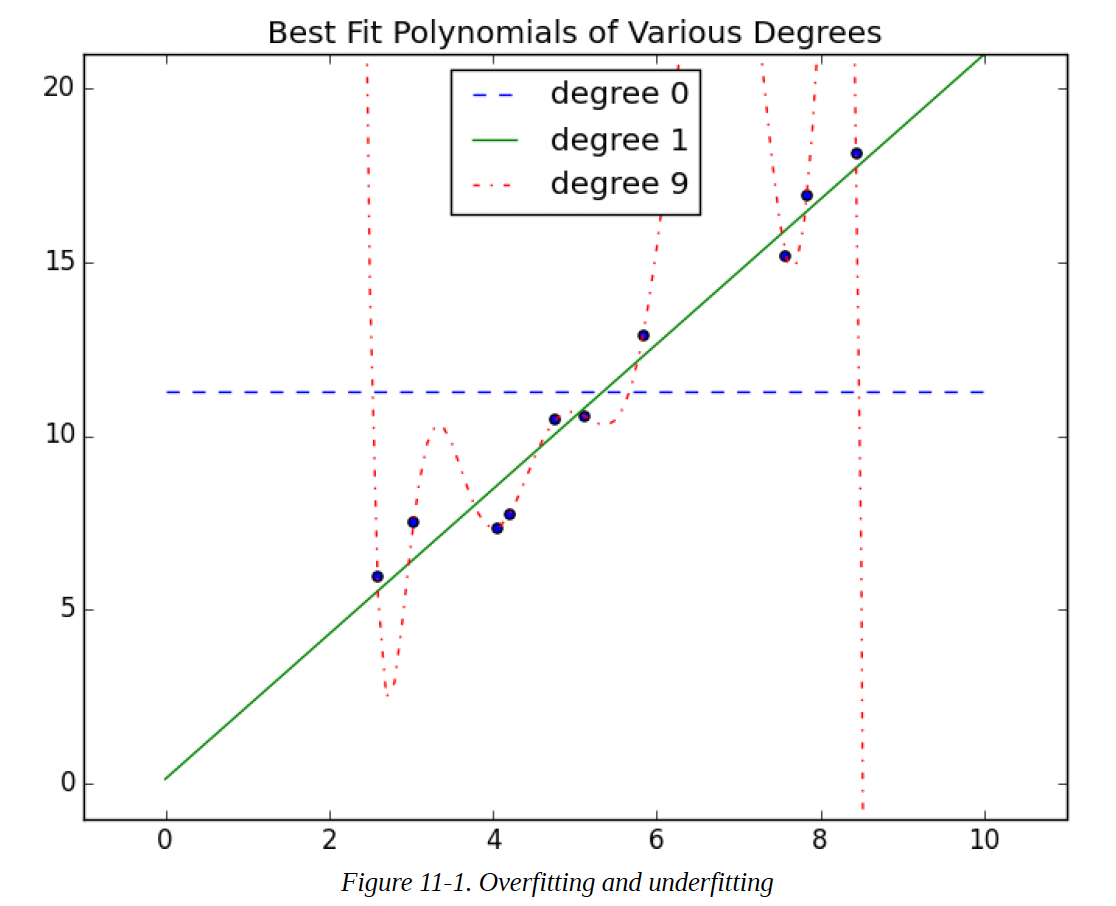


- The horizontal line shows the best fit degree 0 (i.e., constant) polynomial. It severely underfits the training data.

- The best fit degree 9 (i.e., 10-parameter) polynomial goes through every training data point exactly, but it
very severely overfits; if we were to pick a few more data points, it would
quite likely miss them by a lot.

- And the degree 1 line strikes a nice balance; it’s pretty close to every point, and—if these data are representative—the line will likely be close to new data points as well.

- Clearly, models that are too complex lead to overfitting and don’t generalize well beyond the data they were trained on.

So **how do we make sure our models aren’t too complex?**

- The most fundamental approach involves using different data to train the model and to test the model.

- The simplest way to do this is to <u>split the dataset</u>, so that (for example) two-thirds of it is used to train the model, after which we measure the model’s performance on the remaining third.

In [39]:
import random
from typing import TypeVar, List, Tuple
X = TypeVar('X') # Generic type of variable

def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """
    Split data into fractions [prob, 1 - prob]
    """
    data = data[:]
    random.shuffle(data)
    cut = int(len(data) * prob)
    return  data[:cut],data[cut:]

random.seed(0)
data = [n for n in range(1000)]
train, test = split_data(data, 0.7)

# Proportions should be correct
assert len(train) == 700 
assert len(test) == 300 

# Original data should be preserved
assert sorted(train+test) == data

- Often, we’ll have paired input variables and output variables. 
- In that case, we need to make sure to put corresponding values together in either the training data or the test data:

In [108]:
Y = TypeVar('Y')

def train_test_split(xs: List[X], ys: List[Y], test_pct: float) -> Tuple[List[X], List[X], List[Y], List[Y]]:
    idxs = [i for i in range(len(xs))]
    train_idx, test_idx = split_data(idxs, 1-test_pct)
    return ([xs[i] for i in train_idx],
            [xs[i] for i in test_idx],
            [ys[i] for i in train_idx],
            [ys[i] for i in test_idx])

# Let's check
xs = [x for x in range(1000)]
ys = [2*x for x in xs]
x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.25)

# Check if proportions are correct
assert len(x_train) == len(y_train) == 750
assert len(x_test) == len(y_test) == 250

#check that x and y are paired correctly
assert all(y == 2 * x for x, y in zip(x_train, y_train))

- after splitting the data into training set and test set
- we can train our model like:

`model = SomeKindOfModel()`  
`x_train, x_test, y_train, y_test  = train_test_split(xs, ys, 0.33)`   
`model.train(x_train, y_train)`  
`performance = model.test(x_test, y_test)`

- if model performs well on test data - model fits good
- if model does not perform well on test data - probably overfitting

However, there are a couple of ways this can go wrong. 

1. **The first is if there are common patterns in the test and training data that wouldn’t generalize to a larger dataset.**

This scenario highlights the potential issue of overfitting in machine learning models, particularly when dealing with user activity data. If the model learns patterns specific to individual users rather than general relationships between attributes, it may not perform well on new data outside the training and test sets.

For example, let's say you're predicting user behavior based on various features like time spent on a website, number of clicks, etc. If the model learns to identify users rather than identifying general trends in user behavior, it might not generalize well to new users or situations.

To address this, it's essential to use techniques like cross-validation, regularization, and feature engineering to prevent overfitting and ensure that the model captures meaningful patterns in the data rather than memorizing specific instances. Additionally, using larger and more diverse datasets can help the model learn more robust and generalizable patterns.

2. **This is a critical issue known as "data leakage" or "meta-training," where the test set inadvertently becomes part of the training process. If you use the test/train split not just for evaluating models but also for selecting the best-performing model among several alternatives, you're effectively training on the test set.**

Here's how it happens: when you try out multiple models and choose the one with the best performance on the test set, you're indirectly optimizing the model for that specific test set. As a result, the model may appear to perform well on the test set, but its performance might not generalize well to new, unseen data.

To avoid this problem, it's essential to split your data into three sets: training, validation, and test sets. Use the training set to train different models, the validation set to evaluate their performance and select the best one, and the test set to assess the final model's performance on unseen data. This way, you can ensure that your model's performance is reliable and generalizable to new data.

# Correctness of Model

When evaluating the performance of a binary classification model, accuracy alone may not provide a comprehensive assessment of its effectiveness. This note discusses the concept of correctness in model evaluation and illustrates it with examples.

## Categories of Predictions

- In binary classification, predictions fall into four categories:
1. True Positive: The prediction is correct, and the event occurs (e.g., correctly identifying spam emails).
2. False Positive (Type 1 Error): The prediction is incorrect, but the event doesn't occur (e.g., wrongly classifying a non-spam email as spam).
3. False Negative (Type 2 Error): The prediction is incorrect, and the event occurs (e.g., failing to detect a spam email).
4. True Negative: The prediction is correct, and the event doesn't occur (e.g., correctly identifying a non-spam email).

## Confusion Matrix
These categories are often visualized in a confusion matrix:

| Actual              | Predicted Positive | Predicted Negative |
|---------------------|---------------------|---------------------|
| spam                | predicted spam (TP) | predicted not spam (TN) |
| not spam            | predicted spam (FP) | predicted not spam (FN) |

## The Leukemia Test
- Suppose we have a test that predicts whether a newborn baby will develop leukemia with over 98% accuracy. 

- Surprisingly, the test is simple: it predicts leukemia if the baby's name is "Luke," as it sounds similar to "leukemia."

- While the test achieves high accuracy, it's fundamentally flawed and serves as a cautionary example.

- approximately 5 out of 1,000 babies are named Luke
- while the lifetime prevalence of leukemia is about 1.4%.
- Assuming these factors are independent, applying the "Luke is for leukemia" test to 1 million people would yield a confusion matrix.

- Let's say the confucion matrix looks like: 

|                  | Leukemia Prediction | No Leukemia Prediction | Total  |
|------------------|----------------------|------------------------|--------|
| "Luke"           | 70                   | 4,930                  | 5,000  |
| Not "Luke"       | 13,930               | 981,070                | 995,000|
| **Total**        | **14,000**           | **986,000**            | **1,000,000** |


- we use confusion matrix to compute statistcs of model performance

### Accuracy

In [118]:
def accuracy(tp: int, fp: int, fn: int, tn: int) -> float:
    correct_prediction = tp+tn
    total = tp+fp+tn+fn
    return correct_prediction/total

assert accuracy(70, 4930, 13930, 981070) == 0.98114  

# pretty impressive accuracy
#But clearly this is not a goodtest, which means that we probably shouldn’t put a lot of credence in raw accuracy.

### Precision and Recall

**Precision** meausres <u>how accurate our positive predictions are</u> = $ \frac{tp}{tp+fp}$ = $ \frac{predicted\_true\_positives}{total\_actual\_positives}$

**Recall** measure the <u>fraction of positives our model identifies</u> = $ \frac{tp}{tp+fn}$ = $ \frac{predicted\_true\_positive}{predicted\_total\_postives}$
  

In [119]:
def precision(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp / (tp + fp)

assert precision(70, 4930, 13930, 981070) == 0.014

In [121]:
def recall(tp: int, fp: int, fn: int, tn: int) -> float:
    return tp/ (tp + fn)

assert recall(70, 4930, 13930, 981070) == 0.005

- Both are terrible numbers indicating that our model is terrible

### F1 Score

- It is <u>harmonic mean of precision and recall</u>, which is defined as:

In [123]:
def f1_score(tp: int, fp: int, fn: int, tn: int) -> float:
    p = precision(tp, fp, fn, tn)
    r = recall(tp, fp, fn, tn)
    return 2 * p * r / (p + r)

#### Chosing model using F1-score

tradeoff between precision and recall is taken into consideration

1. high F1 score with recall > precision = Confident
2. high F1 score with precision >> recall = Extremely confident

Alternatively, you can think of this as a tradeoff between false positives and false negatives. Saying “yes” too often will give you lots of false positives; saying “no” too often will give you lots of false negatives.

Imagine that there were 10 risk factors for leukemia, and that the more of them you had the more likely you were to develop leukemia. In that case you can imagine a continuum of tests: “predict leukemia if at least one risk factor,” “predict leukemia if at least two risk factors,” and so on. As you increase the threshold, you increase the test’s precision (since people with more risk factors are more likely to develop the disease), and you decrease the test’s recall (since fewer and fewer of the eventual disease-sufferers will meet the threshold). In cases like this, <u>choosing the right threshold is a matter of finding the right tradeoff</u>.

# Bias-Variance tradeoff

## Understanding Overfitting using bias-variance tradeoff
- Both are metrics that assess the behavior of a model when trained on different subsets of data from the same larger population.

## Bias
- A measure of how much the model's predictions deviate from the actual values, even on the training data.

- High bias typically results in underfitting.

## Variance
- A measure of how much the model's predictions vary when trained on different datasets.

- High variance often leads to overfitting.

## High Bias, Low Variance (Underfitting)
- Models with high bias make significant errors on most training data, indicating an inadequate fit.
- However, these models show consistent behavior across different training sets.

## Low Bias, High Variance (Overfitting)
- Models with low bias fit the training data very closely, sometimes too closely, leading to high sensitivity to training data variations.
- This results in poor generalization to new data.

## Addressing Model Problems
- High Bias: <u> Add more features </u> to capture additional information from the data.

- High Variance: <u> Reduce the number of features or obtain more data</u> to provide the model with a broader perspective.

## Impact of Data Size

- In Figure 11-2, we observe the effect of sample size on model fit.
- As the dataset size increases, the degree of overfitting decreases.
- More data helps mitigate variance but does not address bias issues caused by insufficient feature representation.

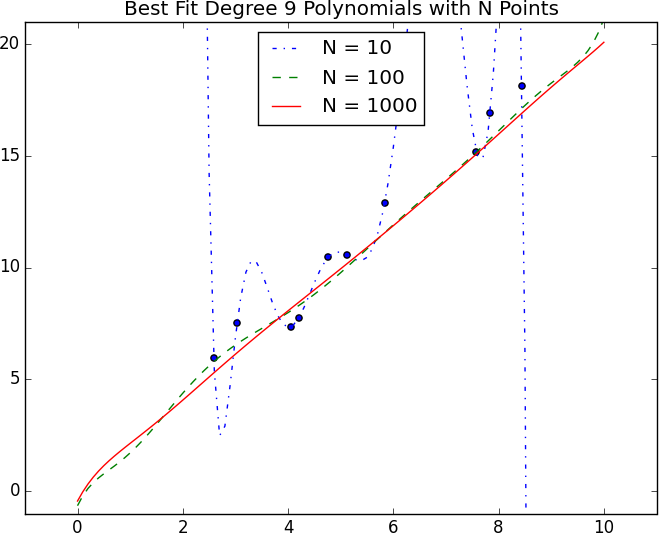

- we can understand it in a linear model:
  $ y = wx + b $
  here, w is weight which indicates variance and b is constant indicating bias.

# Feature Extraction and Selection

- when model does not has enough features -> underfits
- when model has too many features -> overfits

## what is feature?

Features are the **inputs we provide** to our model to make predictions.

**Simplest Case**: In the simplest scenarios, features are straightforward. For instance, if we want to predict someone's salary based on their years of experience, then years of experience is our sole feature.

**Complex Data**: As data becomes more intricate, feature extraction becomes crucial.

For example, in building a spam filter, we need to extract features from raw email data, such as the 
(a) presence of specific words like "Viagra" or sender's domain.

## Feature Types

Features typically fall into three categories:
1. binary (yes or no),
2. numeric (quantitative), or
3. categorical (discrete choices)
  
For example in email spam filter our features can be:
1. if text contains term "Viagra" - binary(yes/no)
2. how many times word d is mentioned - numeric
3. what is domain of sender - from a set of discrete options

## Model types based on features
Different types of models are suited to different feature types.

1. **Naive Bayes Classifier**: Suited for binary features.

2. **Regression Models**: Require numeric features, including dummy variables.

3. **Decision Trees**: Can handle both numeric and categorical data.

## Feature Reduction

- Sometimes, rather than creating new features, it's beneficial to reduce the number of features.

- Techniques like <u> dimensionality reduction </u>  or <u>regularization</u>  help achieve this by distilling down hundreds of features to a few significant dimensions or penalizing models for using excessive features.
  
## Feature Selection Process

- Choosing features involves a mix of experience and domain expertise. 

- For example, in spam filtering, knowing which words are indicative of spam and which are not comes from experience.

- Experimentation is often required to determine the most effective features, adding to the excitement of the process.